This notebook contains various examples of fitting models to data.
- scipy.stats.linregress
- numpy.polyfit
- scipy.optimize.curve_fit

Date Created: Sep 23 2017
<br>
Last Modified: Feb 12 2018
<br>
Humans Responsible: The Prickly Pythons
<br>
Kernel used: Python 3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# scipy.stats.linregress

Official documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
- Fits data to straight line.
- Returns r^2 value of the fit and other measures of regression goodness.

In [2]:
# Generate some synthetic data
x = np.arange(0,10)
y = x + np.random.rand(10)*3.
# (rand() returns a random number between 0 and 1.)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[  2.49203234   2.60020464   4.39461928   5.68487239   5.21871973
   5.08913947   6.25941227   8.15154709  10.82006884  10.92928637]


In [3]:
import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# Performing a linear regression data this way 
# will return 5 values that must all be named!
#If you're not interested in all of these:
slope, intercept, *stats = stats.linregress(x,y)

print(slope, intercept)

0.932442509894 1.96799894797


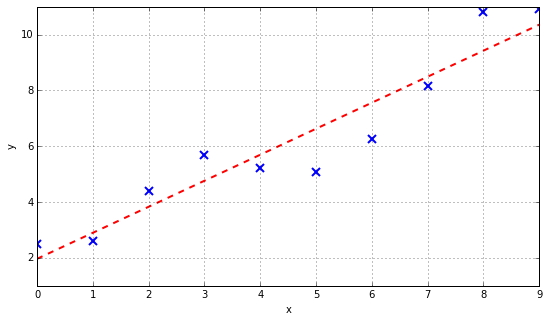

In [4]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, 'x', mew=2, ms=8, color='blue')
ax1.plot(x, x*slope+intercept, ls='--', color='red', lw=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid()
plt.show()

R-value or coefficient of determination (https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [5]:
print('r^2: %.2f' % r_value)

r^2: 0.95


p-value: hypothesis test whose null hypothesis is that the slope is zero:

In [6]:
print('p-value: %e' % p_value) 

p-value: 3.175766e-05


In [7]:
# Same as:
print(stats[1])

3.17576555393e-05


# numpy.polyfit
Official Documentation: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
- Fits polynoimals to data.
- Can handle fitting with error bars.
- Faster than scipy.optimize.curve_fit but can only fit for polynomials.

### Linear regression with and without error bars

In [8]:
# Generate some synthetic data (again)
data_len = 10
x = np.linspace(0, 10, data_len)

# Errors in y
dy_std = 3*np.random.rand(data_len) + 1 # "sigma"
dy = dy_std * np.random.randn(data_len) # "error"
# (randn() returns a sample (or samples) from the “standard normal” distribution.)

# This is our data
y = x + dy

In [9]:
# Do a linear fit with weighted data points
coeff, *stats = np.polyfit(x, y, deg=1, w=1/dy_std, full=True)

# Fitted function
y_fit = coeff[0]*x + coeff[1]

print(coeff)
print(stats)

[ 0.83591565  1.67445201]
[array([ 3.86738613]), 2, array([ 1.35755084,  0.39630257]), 2.2204460492503131e-15]


In [10]:
# Compare with unweighted linear fit
coeff, *stats = np.polyfit(x, y, deg=1, full=True)

# Fitted function
y_fitUnweighted = coeff[0]*x + coeff[1]

print(coeff)
print(stats)

[ 0.79063729  2.07401126]
[array([ 25.73329231]), 2, array([ 1.35754456,  0.39632407]), 2.2204460492503131e-15]


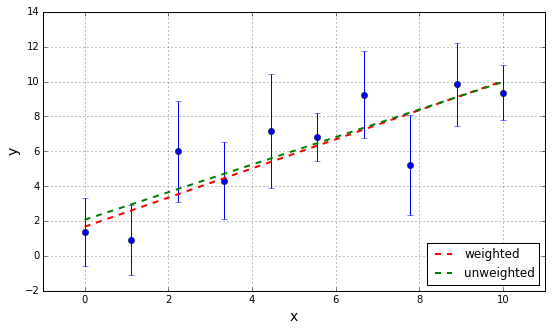

In [11]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=dy_std, fmt='o')
ax.plot(x, y_fit, color='red', linestyle='dashed', linewidth=2, label='weighted')
ax.plot(x, y_fitUnweighted, color='green', linestyle='dashed', linewidth=2, label='unweighted')
ax.set_xlim(left=-1, right=11)
ax.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='lower right')
plt.show()

### Fitting a polynomial with deg > 1

In [12]:
# Generate some synthetic data
data_len = 10
x = np.linspace(0, 10, data_len)

# This is our data
noise = (np.random.rand(data_len) - 0.5)*30
y = x**2 + 3*x - 1 + noise

In [13]:
coeff, *stats = np.polyfit(x, y, deg=2, full=True)
print(coeff)
print(stats)

y_fit = coeff[0]*x**2 + coeff[1]*x + coeff[2]

[  0.63929305   6.5158868  -10.98083101]
[array([ 302.56091276]), 3, array([ 1.64219501,  0.53895301,  0.11280603]), 2.2204460492503131e-15]


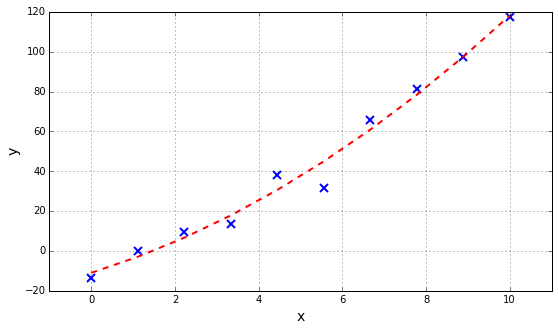

In [14]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'x', mew=2, ms=8, color='blue')
ax.plot(x, y_fit, color='red', linestyle='dashed', linewidth=2, label='weighted')
ax.set_xlim(left=-1, right=11)
ax.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

# scipy.optimize.curve_fit
Official Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
- General - Can fit data to any function.
- Iterative methods - may be slow.

In [15]:
# Generate some synthetic data
sigma = 3
mu = 10
num_samples = 1000

s = sigma * np.random.randn(num_samples)*5. + mu

In [16]:
# Make a histogram
num_bin = 20
hist, bin_edges = np.histogram(s, bins=num_bin)

bin_center = (bin_edges[:-1] + bin_edges[1:]) / 2
# (bin_center will be one element shorter than bin_edges)

x = bin_center
y = hist
print(x)
print(y)

[-36.28851413 -31.15460551 -26.0206969  -20.88678828 -15.75287966
 -10.61897105  -5.48506243  -0.35115381   4.78275481   9.91666342
  15.05057204  20.18448066  25.31838927  30.45229789  35.58620651
  40.72011513  45.85402374  50.98793236  56.12184098  61.25574959]
[  1   0   8   9  34  61  77 100 141 117 146  99  78  60  36  15  10   5
   1   2]


In [17]:
from scipy.optimize import curve_fit

# Define a Gaussian function
def func(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

# Supply an intial guess.
# Parameter A should be close to the maximum of the data
# Parameter mu should be close to the mean of the data
# Parameter sigma should be close to the standard deviation of the data
initial_guess = [np.max(y), np.mean(y), np.std(y)]

# Do the fitting
p_opt, p_cov = curve_fit(func, x, y, p0=initial_guess, maxfev=1000)

# Gives the optimized parameters and the covariance matrix:
print(p_opt)
print(p_cov)

[ 134.98412232   10.09545087   15.22813426]
[[  1.98093582e+01   1.99440375e-04  -1.49046313e+00]
 [  1.99440375e-04   3.36112019e-01  -4.95408300e-05]
 [ -1.49046313e+00  -4.95408300e-05   3.36309713e-01]]


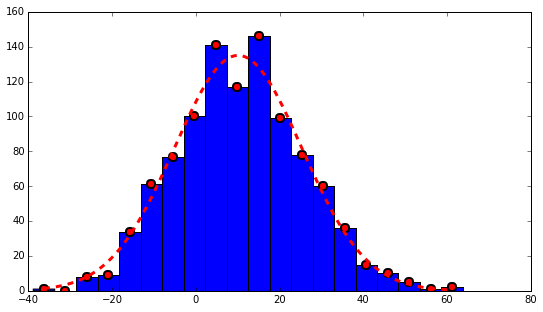

In [18]:
# Plot the results
x_plot = np.arange(np.min(x),np.max(x),0.1)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.hist(s, bins=num_bin)
ax.plot(x, y, 'o', mew=2, markersize=8, color='red')
ax.plot(x_plot, func(x_plot, *p_opt), linewidth=3, color='red', linestyle='dashed')
plt.show()